## Preparing the Data

In [1]:
# Dependencies
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import os
import numpy as np

# Create paths to reasources
mouse_data_path = os.path.join('Data', 'Mouse_metadata.csv')
study_results_path = os.path.join('Data', 'Study_results.csv')

# Load csvs as dfs...
mouse_df = pd.read_csv(mouse_data_path)
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
study_df = pd. read_csv(study_results_path)
study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
mouse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [4]:
study_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [5]:
len(mouse_df['Mouse ID'])

249

In [6]:
len(study_df['Mouse ID'].unique())

249

Both dfs are complete meaning they do not have any **NAs** or missing data. The dfs are different sizes but it looks like there is one entry for ever mouse ID in mouse df. So merge with adding mouse df onto study df.


In [7]:
study_df = pd.merge(study_df, mouse_df, how='left')
study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
study_df.loc[study_df['Timepoint'] == 0, ['Mouse ID']].value_counts()

Mouse ID
g989        2
a203        1
s121        1
q597        1
q610        1
           ..
j246        1
j296        1
j365        1
j755        1
z969        1
Length: 249, dtype: int64

In [9]:
study_df.loc[study_df['Mouse ID'] == 'g989', :]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
study_df.drop(index=[107,137,329,360,620,681,815,869,950,1111,1195,1380,1592], inplace=True)
mouse_df.drop(index=107, inplace=True)

In [11]:
len(study_df['Mouse ID'].unique())

248

## Summary Statistics

In [12]:
# Intialize summary df
summary_df = pd.DataFrame()

summary_df['Mean'] = study_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
summary_df['Median'] = study_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
summary_df['Variance'] = study_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
summary_df['std'] = study_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
summary_df['SEM'] = study_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

summary_df

,Mean,Median,Variance,std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
summary_df = study_df.groupby('Drug Regimen').agg(Mean=('Tumor Volume (mm3)','mean'),
                                                 Meadian=('Tumor Volume (mm3)','median'),
                                                 Variance=('Tumor Volume (mm3)','var'),
                                                 std=('Tumor Volume (mm3)','std'),
                                                 SEM=('Tumor Volume (mm3)','sem'))
summary_df

,Mean,Meadian,Variance,std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


 ## Number of Timepoints (Bar Chart)

<AxesSubplot:title={'center':'Total Number of Timepoints for Mice Tested'}, xlabel='Drug Regimen', ylabel='# of Timpoints'>

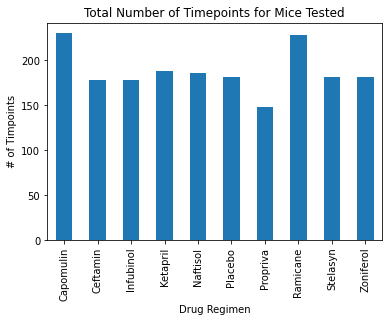

In [14]:
study_df.groupby('Drug Regimen').count()['Timepoint'].plot(kind='bar', ylabel='# of Timpoints', title='Total Number of Timepoints for Mice Tested')

Text(0.5, 1.0, 'Total Number of Timepoints for Mice Tested')

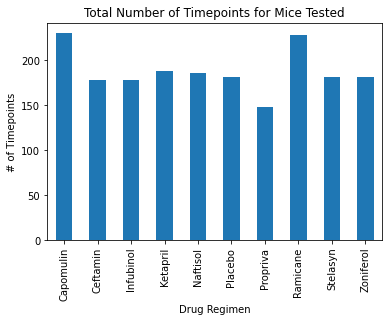

In [15]:
x_axis = np.arange(len(study_df.groupby('Drug Regimen').count()['Timepoint']))
tick_locations = [value for value in x_axis]
labels = study_df.sort_values('Drug Regimen')['Drug Regimen'].unique()
plt.bar(x_axis, study_df.groupby('Drug Regimen').count()['Timepoint'], width=.5)
plt.xticks(tick_locations, labels, rotation='vertical')
plt.xlim(-0.5, len(x_axis)-0.5)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Timepoints')
plt.title('Total Number of Timepoints for Mice Tested')

## Number of Mice by Sex (Pie Chart)

<AxesSubplot:>

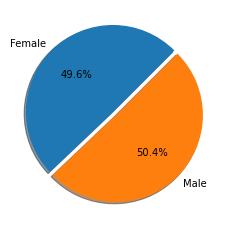

In [16]:
mouse_df.groupby('Sex').count()['Mouse ID'].plot(kind='pie', ylabel='', autopct='%.1f%%', shadow=True, startangle=45, explode=[.05,0])

In [17]:
study_df.groupby('Drug Regimen').count()['Timepoint']

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

([<matplotlib.patches.Wedge at 0x267956eaac0>,
 [Text(-0.8028068003151382, 0.8234083078083254, 'Female'),
  Text(0.7679021568231755, -0.7876079465992679, 'Male')],
 [Text(-0.45376036539551284, 0.46540469571774906, '49.6%'),
  Text(0.41885572190355025, -0.42960433450869157, '50.4%')])

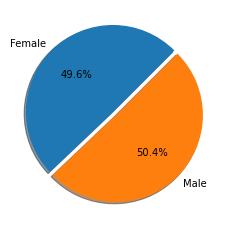

In [18]:
sizes = mouse_df.groupby('Sex', as_index=False).count()['Mouse ID']
labels = mouse_df.groupby('Sex', as_index=False).count()['Sex']
plt.pie(mouse_df.groupby('Sex').count()['Mouse ID'], labels=labels, autopct='%.1f%%', shadow=True, startangle=45, explode=[.05,0])


## Final Tumor Volume Summary Table by Drug Regimen

In [ ]:
# Create df that stores maximum timepoint for each mouse ID
greatest_timepoint_by_ID = study_df.groupby('Mouse ID').max()['Timepoint']

# Merge new df with original on ID and timepoint for each pair of ID and timepoint from the new df (the one that only has the maximun timepoints)
greatest_timepoint_by_ID = pd.merge(greatest_timepoint_by_ID, study_df, on=['Mouse ID','Timepoint'], how='left')

greatest_timepoint_by_ID

# Create a list of Drug Regimens of interest
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

final_volume_list = []
outlier_list = []
volume_by_drug_summary = pd.DataFrame()

# Loop through the different drug regimens
for index, drug in enumerate(drugs):
    
    # Get  all tumor volumes at max timepoint for current regimen
    final_volume = greatest_timepoint_by_ID.loc[greatest_timepoint_by_ID['Drug Regimen'] == drug, :]
    
    final_volume_list.append(final_volume['Tumor Volume (mm3)'])
    
    # Read quartiles and fill in summary table
    quars = final_volume_list[index].quantile([.25,.5,.75])
    volume_by_drug_summary.loc[drug, 'Q1'] = quars[.25]
    volume_by_drug_summary.loc[drug, 'Median'] = quars[.5]
    volume_by_drug_summary.loc[drug, 'Q3'] = quars[.75]
    volume_by_drug_summary.loc[drug, 'IQR'] = quars[.75] - quars[.25]
    volume_by_drug_summary.loc[drug, 'Lower Bound'] = quars[.25] - 1.5 * (quars[.75] - quars[.25])
    volume_by_drug_summary.loc[drug, 'Upper Bound'] = quars[.75] + 1.5 * (quars[.75] - quars[.25])
    volume_by_drug_summary.loc[drug, 'Number of Outliers'] = final_volume.loc[(final_volume['Tumor Volume (mm3)'] > volume_by_drug_summary.loc[drug, 'Upper Bound']) | (final_volume['Tumor Volume (mm3)'] < volume_by_drug_summary.loc[drug, 'Lower Bound']), 'Tumor Volume (mm3)'].count()    
    
    # Fill list of outliers
    outlier_list.append(final_volume.loc[(final_volume['Tumor Volume (mm3)'] > volume_by_drug_summary.loc[drug, 'Upper Bound']) | (final_volume['Tumor Volume (mm3)'] < volume_by_drug_summary.loc[drug, 'Lower Bound']), :])

Summary table of final tumor volume for each drug regimen:

In [100]:
volume_by_drug_summary

,Q1,Median,Q3,IQR,Lower Bound,Upper Bound,Number of Outliers
Capomulin,32.377357,38.125164,40.159220,7.781863,20.704562,51.832015,0.0
Ramicane,31.560470,36.561652,40.659006,9.098537,17.912664,54.306811,0.0
Infubinol,54.048608,60.165180,65.525743,11.477135,36.832905,82.741446,1.0
Ceftamin,48.722078,59.851956,64.299830,15.577752,25.355450,87.666458,0.0


The only potential outlier for Infubinol is:

In [101]:
outlier_list[2]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
31,c326,5,36.321346,0,Infubinol,Female,18,25


## Final Tumor Volume Box Plot

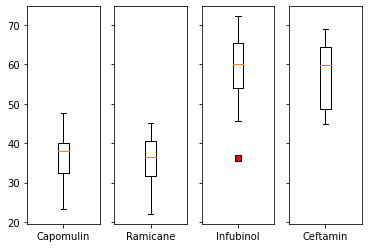

In [45]:
#Create subplots and color outliesr
fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, sharey=True)
ax0.boxplot(final_volume_list[0], labels=['Capomulin'], flierprops={'markerfacecolor':'r','marker':'s'})
ax1.boxplot(final_volume_list[1], labels=['Ramicane'], flierprops={'markerfacecolor':'r','marker':'s'})
ax2.boxplot(final_volume_list[2], labels=['Infubinol'], flierprops={'markerfacecolor':'r','marker':'s'})
ax3.boxplot(final_volume_list[3], labels=['Ceftamin'], flierprops={'markerfacecolor':'r','marker':'s'})

plt.show()

## Tumor Volume Over Time Line Plot

In [51]:
capomulin_df = study_df.loc[study_df['Drug Regimen'] == 'Capomulin', :]
capomulin_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


In [53]:
b128_df = study_df.loc[study_df['Mouse ID'] == 'b128', :]
b128_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
472,b128,5,45.651331,0,Capomulin,Female,9,22
679,b128,10,43.270852,0,Capomulin,Female,9,22
719,b128,15,43.784893,0,Capomulin,Female,9,22
933,b128,20,42.731552,0,Capomulin,Female,9,22
1268,b128,25,43.262145,1,Capomulin,Female,9,22
1400,b128,30,40.605335,1,Capomulin,Female,9,22
1547,b128,35,37.967644,1,Capomulin,Female,9,22
1629,b128,40,38.379726,2,Capomulin,Female,9,22
1764,b128,45,38.982878,2,Capomulin,Female,9,22


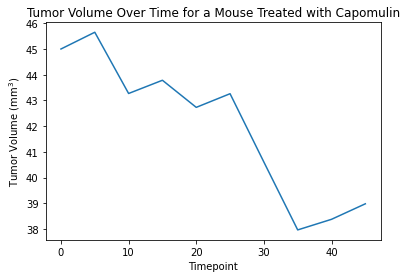

In [61]:
plt.plot(b128_df['Timepoint'], b128_df['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm$^{3}$)')
plt.title('Tumor Volume Over Time for a Mouse Treated with Capomulin')
plt.show()

## Average Tumor Volume vs. Weight Scatter Plot

Text(0.5, 1.0, 'Tumor Volume vs. Weight for Mice Treated with Capomulin')

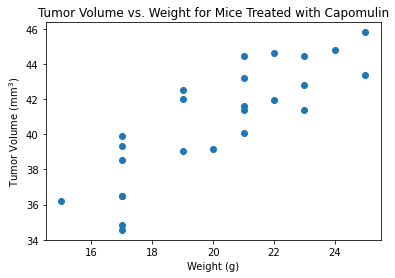

In [72]:
average_volume_by_ID_for_capomulin = (study_df.loc[study_df['Drug Regimen'] == 'Capomulin', :]).groupby('Mouse ID').mean()

plt.scatter(average_volume_by_ID_for_capomulin['Weight (g)'], average_volume_by_ID_for_capomulin['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm$^{3}$)')
plt.title('Tumor Volume vs. Weight for Mice Treated with Capomulin')

## Correlation Between Average Tumor Volume and Weight for Mice Treated with Capomulin and Scatter Plot with Best-fit Line

Correlation coefficient for Average Tumor Volume vs Weight of mice treated with capomulin is:

In [104]:
# Compute Pearson's r value
round(st.pearsonr(average_volume_by_ID_for_capomulin['Weight (g)'], average_volume_by_ID_for_capomulin['Tumor Volume (mm3)'])[0],2)

0.84

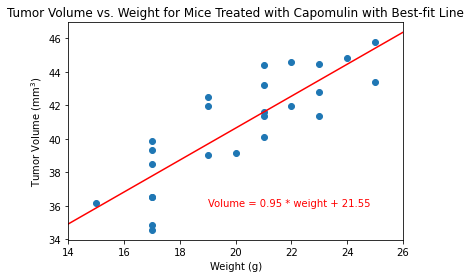

In [110]:
# Compute linear regression and unpack values to tuple
m, b, r, p, e = st.linregress(average_volume_by_ID_for_capomulin['Weight (g)'], average_volume_by_ID_for_capomulin['Tumor Volume (mm3)'])

# Use values from tuple to make a string that summarizes the lin reg
eq = f'Volume = {round(m,2)} * weight + {round(b,2)}'

# Plot the Scatter plot again, this time with lin reg equation
plt.scatter(average_volume_by_ID_for_capomulin['Weight (g)'], average_volume_by_ID_for_capomulin['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.xlim(14, 26)
plt.ylabel('Tumor Volume (mm$^{3}$)')
plt.title('Tumor Volume vs. Weight for Mice Treated with Capomulin with Best-fit Line')
plt.plot(range(14,27), (range(14,27) * m + b), 'r')
plt.text(19, 36, eq, color='red')
plt.show()